In [93]:
import os 
import re
import ast
import anndata as ad 
import numpy as np 
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
adata = ad.read_h5ad('/sbgenomics/project-files/processed_MERFISH/HTAPP-313_centroids.h5ad')

In [95]:
control_markers = ['FTL', 'IGHG1', 'IGHG4', 'IGHM', 'IGKC', 'TMSB4X', 'LIPE', 'ALB']
markers_to_keep = [x for x in adata.var_names if x not in control_markers]

In [96]:
adata = adata[:,markers_to_keep]

In [97]:
adata

View of AnnData object with n_obs × n_vars = 11441 × 291
    obs: 'z_height', 'x_boundary', 'y_boundary', 'x_centroid', 'y_centroid'

/opt/conda/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWa

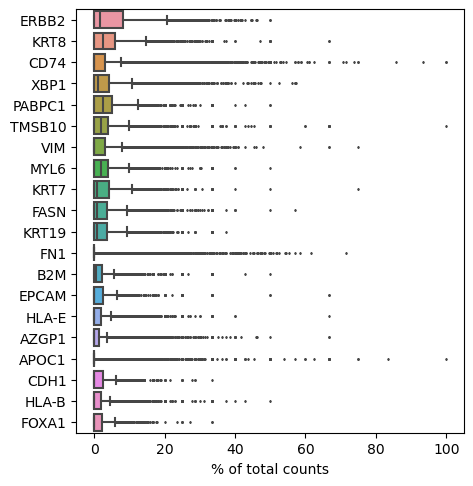

In [98]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [99]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

/tmp/ipykernel_250/831607521.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
/tmp/ipykernel_250/831607521.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[1])


<Axes: xlabel='n_genes_by_counts'>

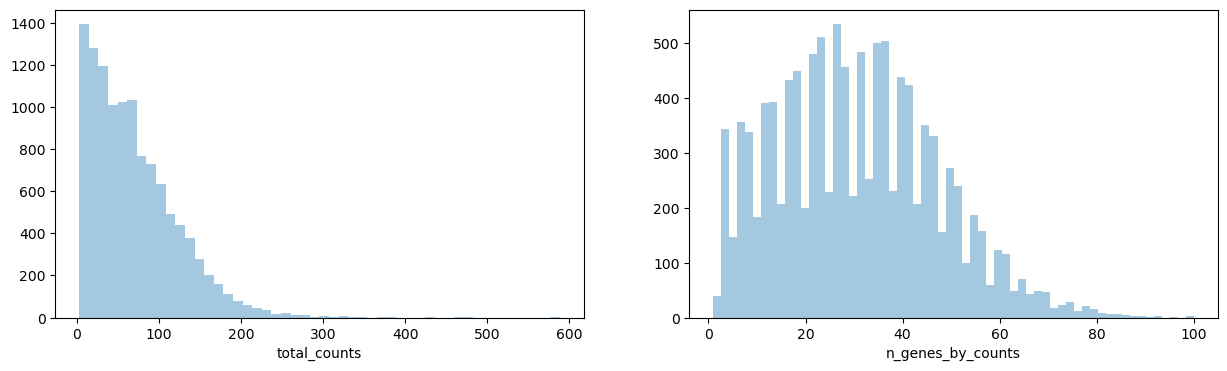

In [100]:
fig, axs = plt.subplots(1,2,figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[1])

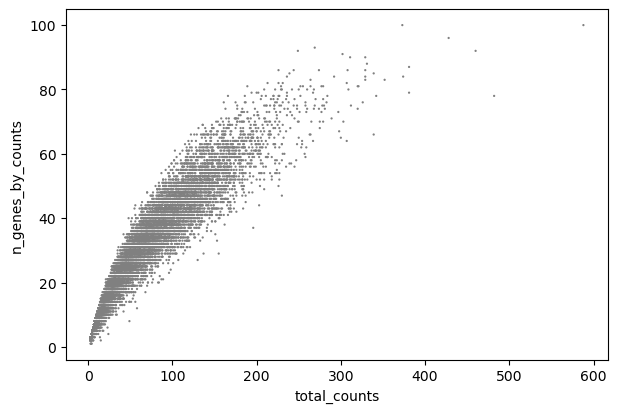

In [101]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [102]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [103]:
sc.pp.log1p(adata)

In [104]:
sc.pp.scale(adata, max_value=10)

In [105]:
sc.tl.pca(adata, svd_solver='arpack')

In [106]:
sc.pp.neighbors(adata, n_neighbors=10)

In [107]:
sc.tl.umap(adata)

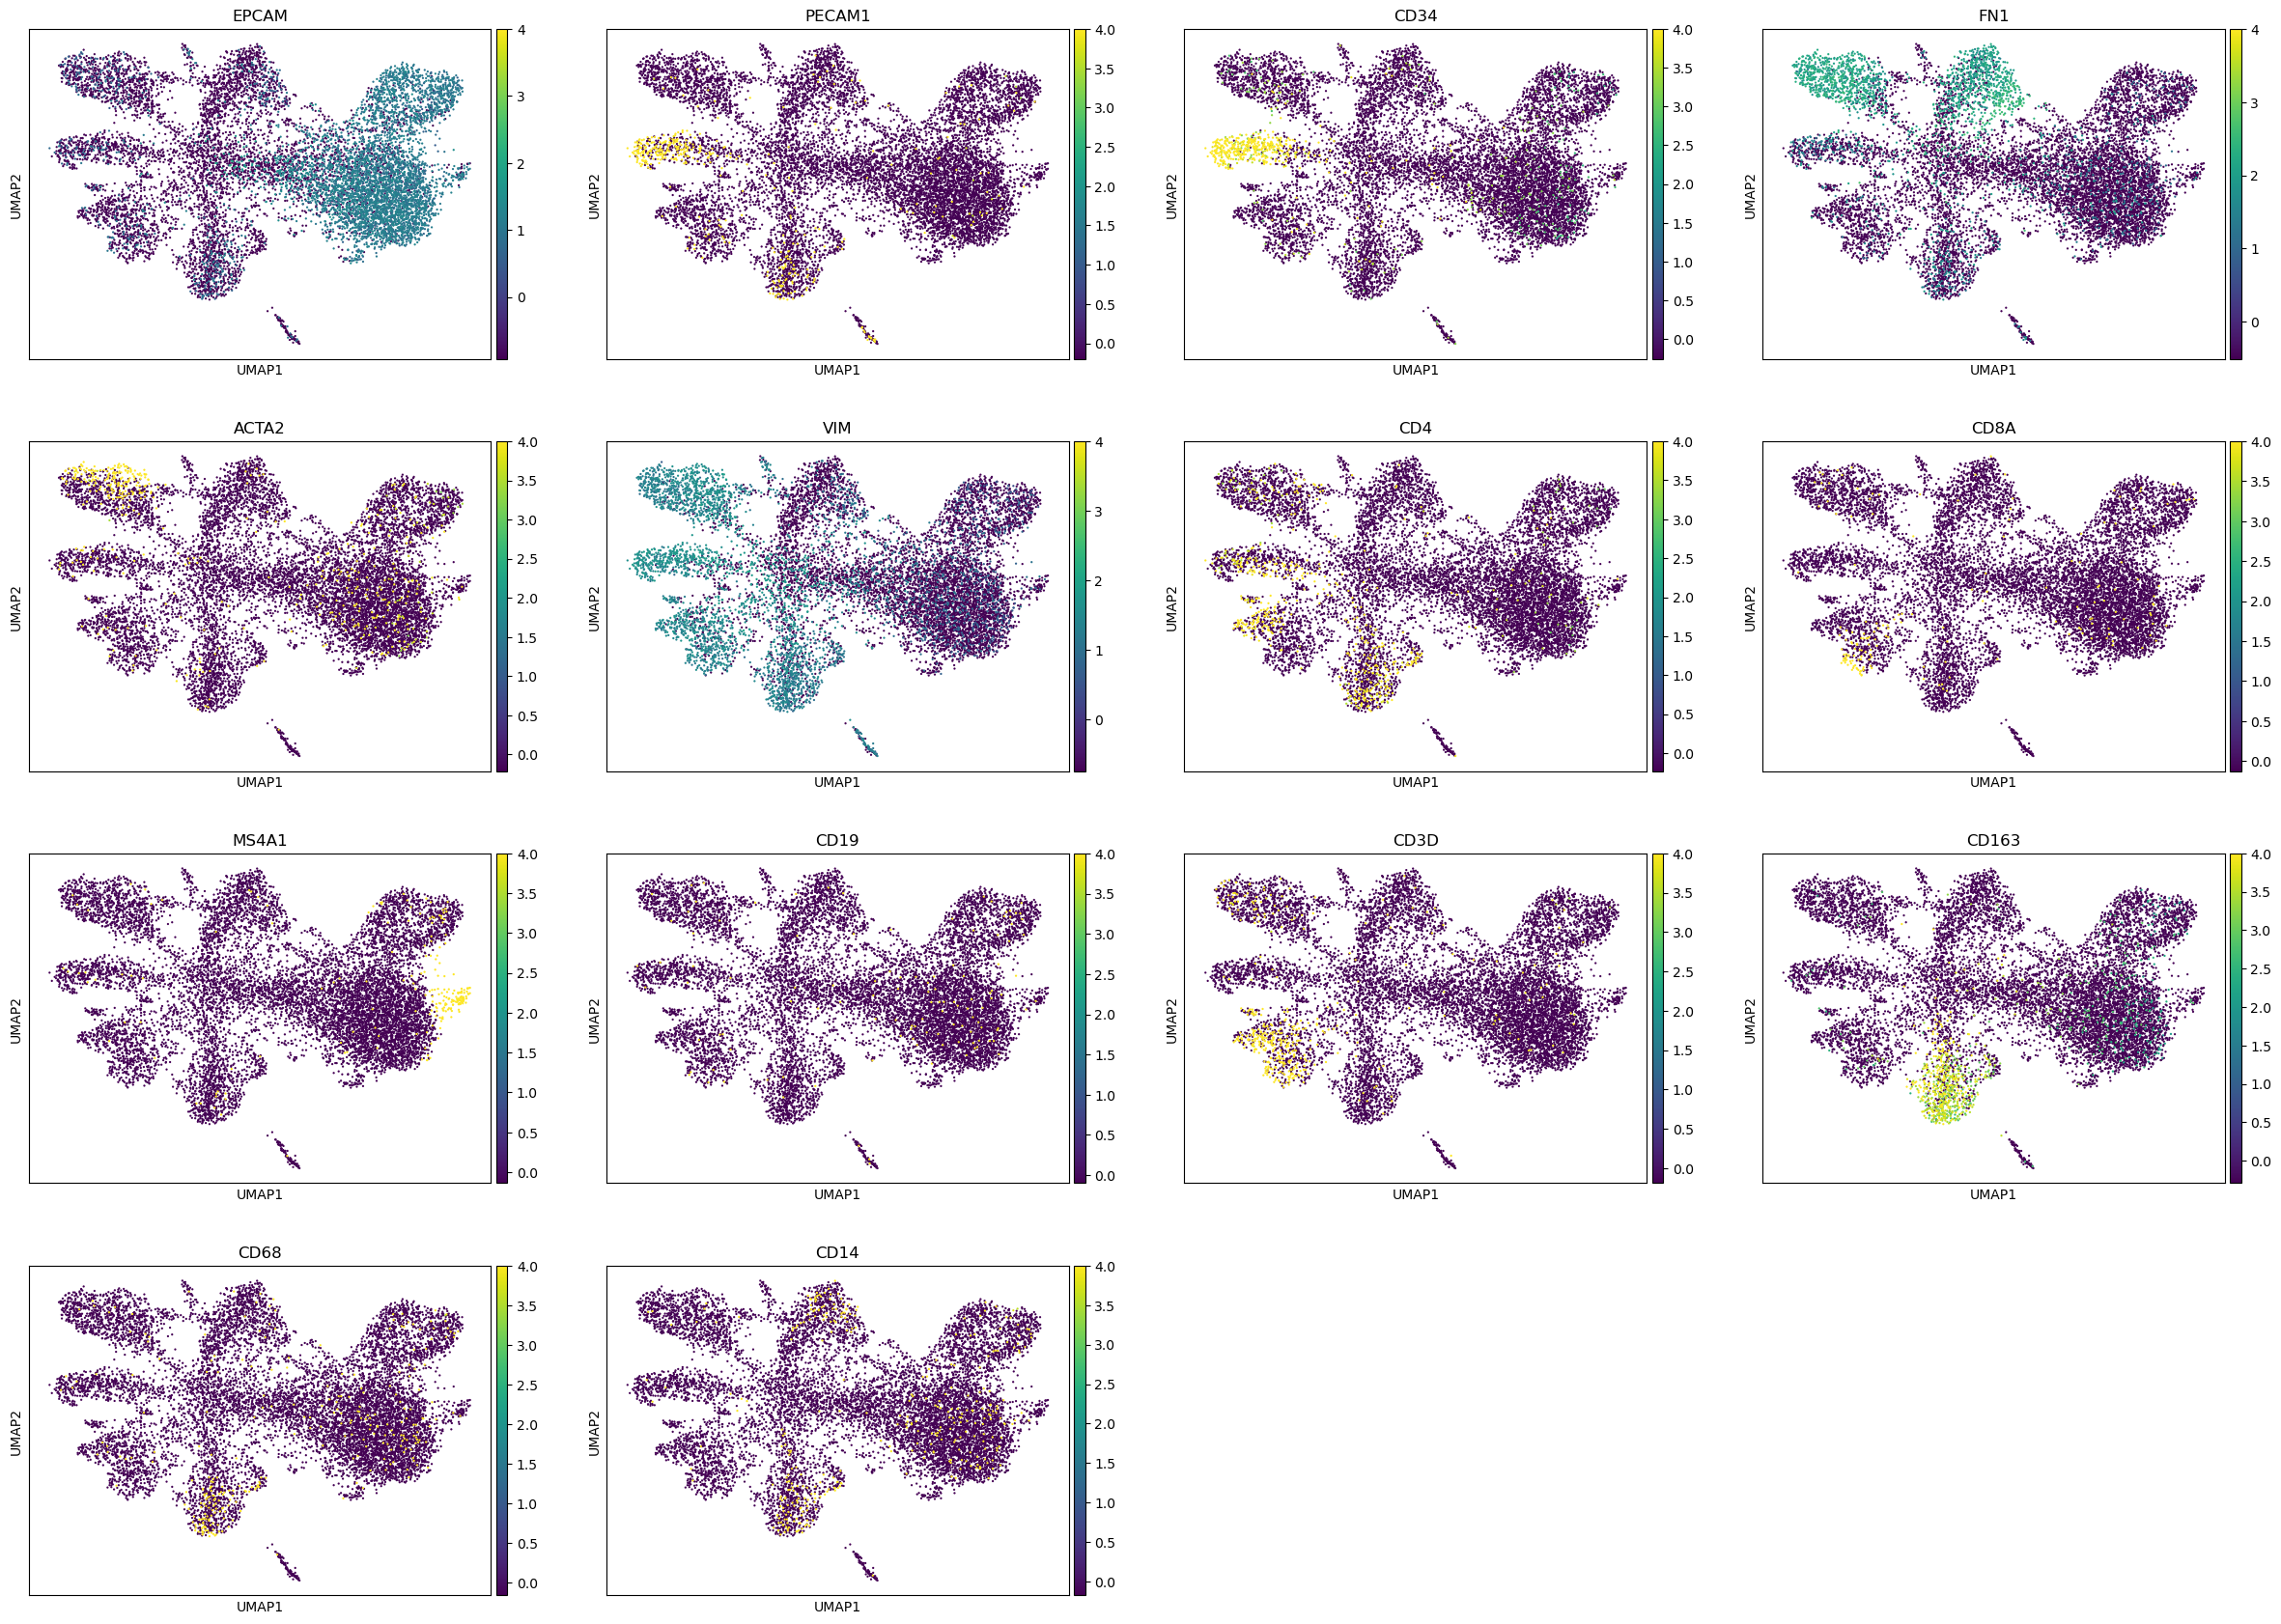

In [122]:
sc.pl.umap(adata, color=['EPCAM','PECAM1','CD34','FN1','ACTA2','VIM',
                         'CD4','CD8A','MS4A1','CD19','CD3D',
                         'CD163','CD68','CD14'],vmax=4)

In [ ]:
# target cell types 
# []

In [124]:
sc.tl.leiden(adata)

/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


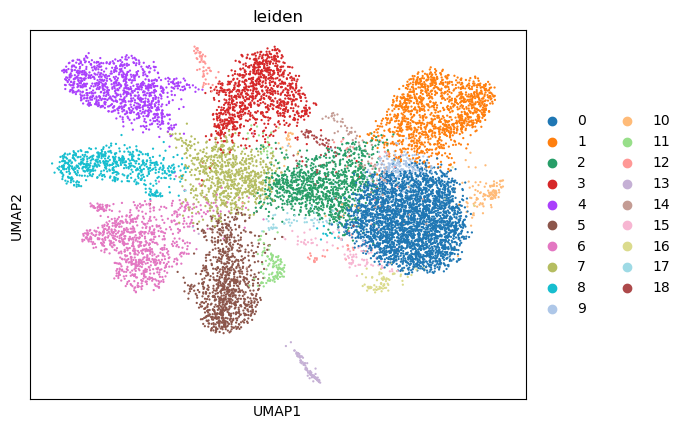

In [125]:
sc.pl.umap(adata, color = 'leiden')

In [126]:
adata.obs.leiden.dtype

CategoricalDtype(categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
                  '12', '13', '14', '15', '16', '17', '18'],
, ordered=False, categories_dtype=object)

In [135]:
leiden_celltype_map = {

    '0' : 'MBC', 
    '1' : 'MBC', 
    '2' : 'MBC', 
    '3' : 'Fibroblast',
    '4' : 'Activated Fibroblast',
    '5' : 'Macrophage_Monocyte',
    '6' : 'T',
    '7' : 'Unknown',
    '8' : 'Endothelial',
    '9' : 'MBC',
    '10' : 'B cell',
    '11' : 'Immune',
    '12' : 'Unknown_stem',
    '13' : 'Unknown_vasculature',
    '14' : 'MBC',
    '15' : 'MBC',
    '16' : 'MBC',
    '17' : 'MBC',
    '18' : 'Unknown'
}

adata.obs['cell_type'] = adata.obs['leiden'].map(leiden_celltype_map)

/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


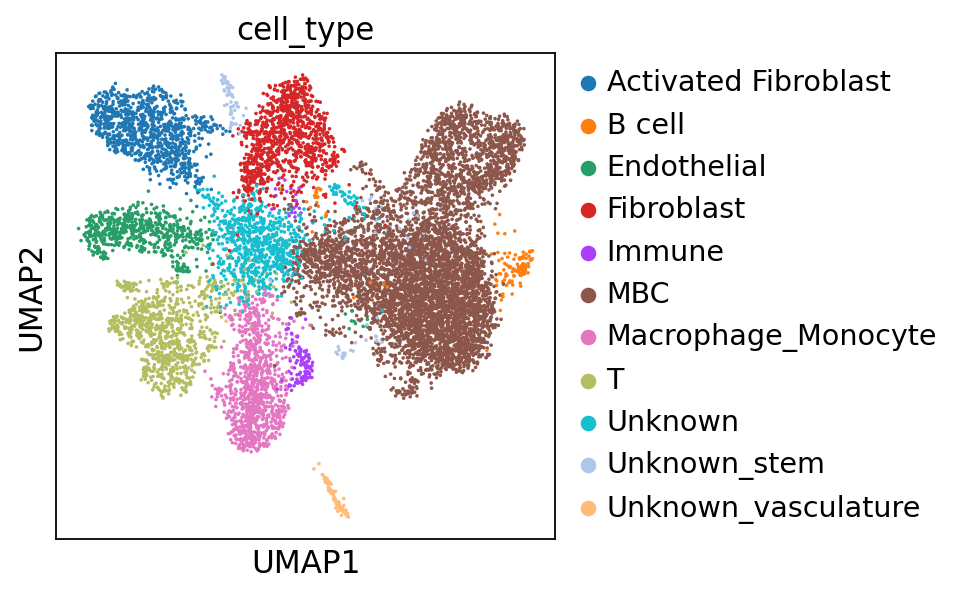

In [144]:
sc.pl.umap(adata, color = 'cell_type', save = 'celltype_umap.png')

/opt/conda/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/opt/conda/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/opt/conda/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/opt/conda/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/opt/conda/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/opt/conda/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: 

categories: Activated Fibroblast, B cell, Endothelial, etc.
var_group_labels: MBC, B cell, Endothelial, etc.


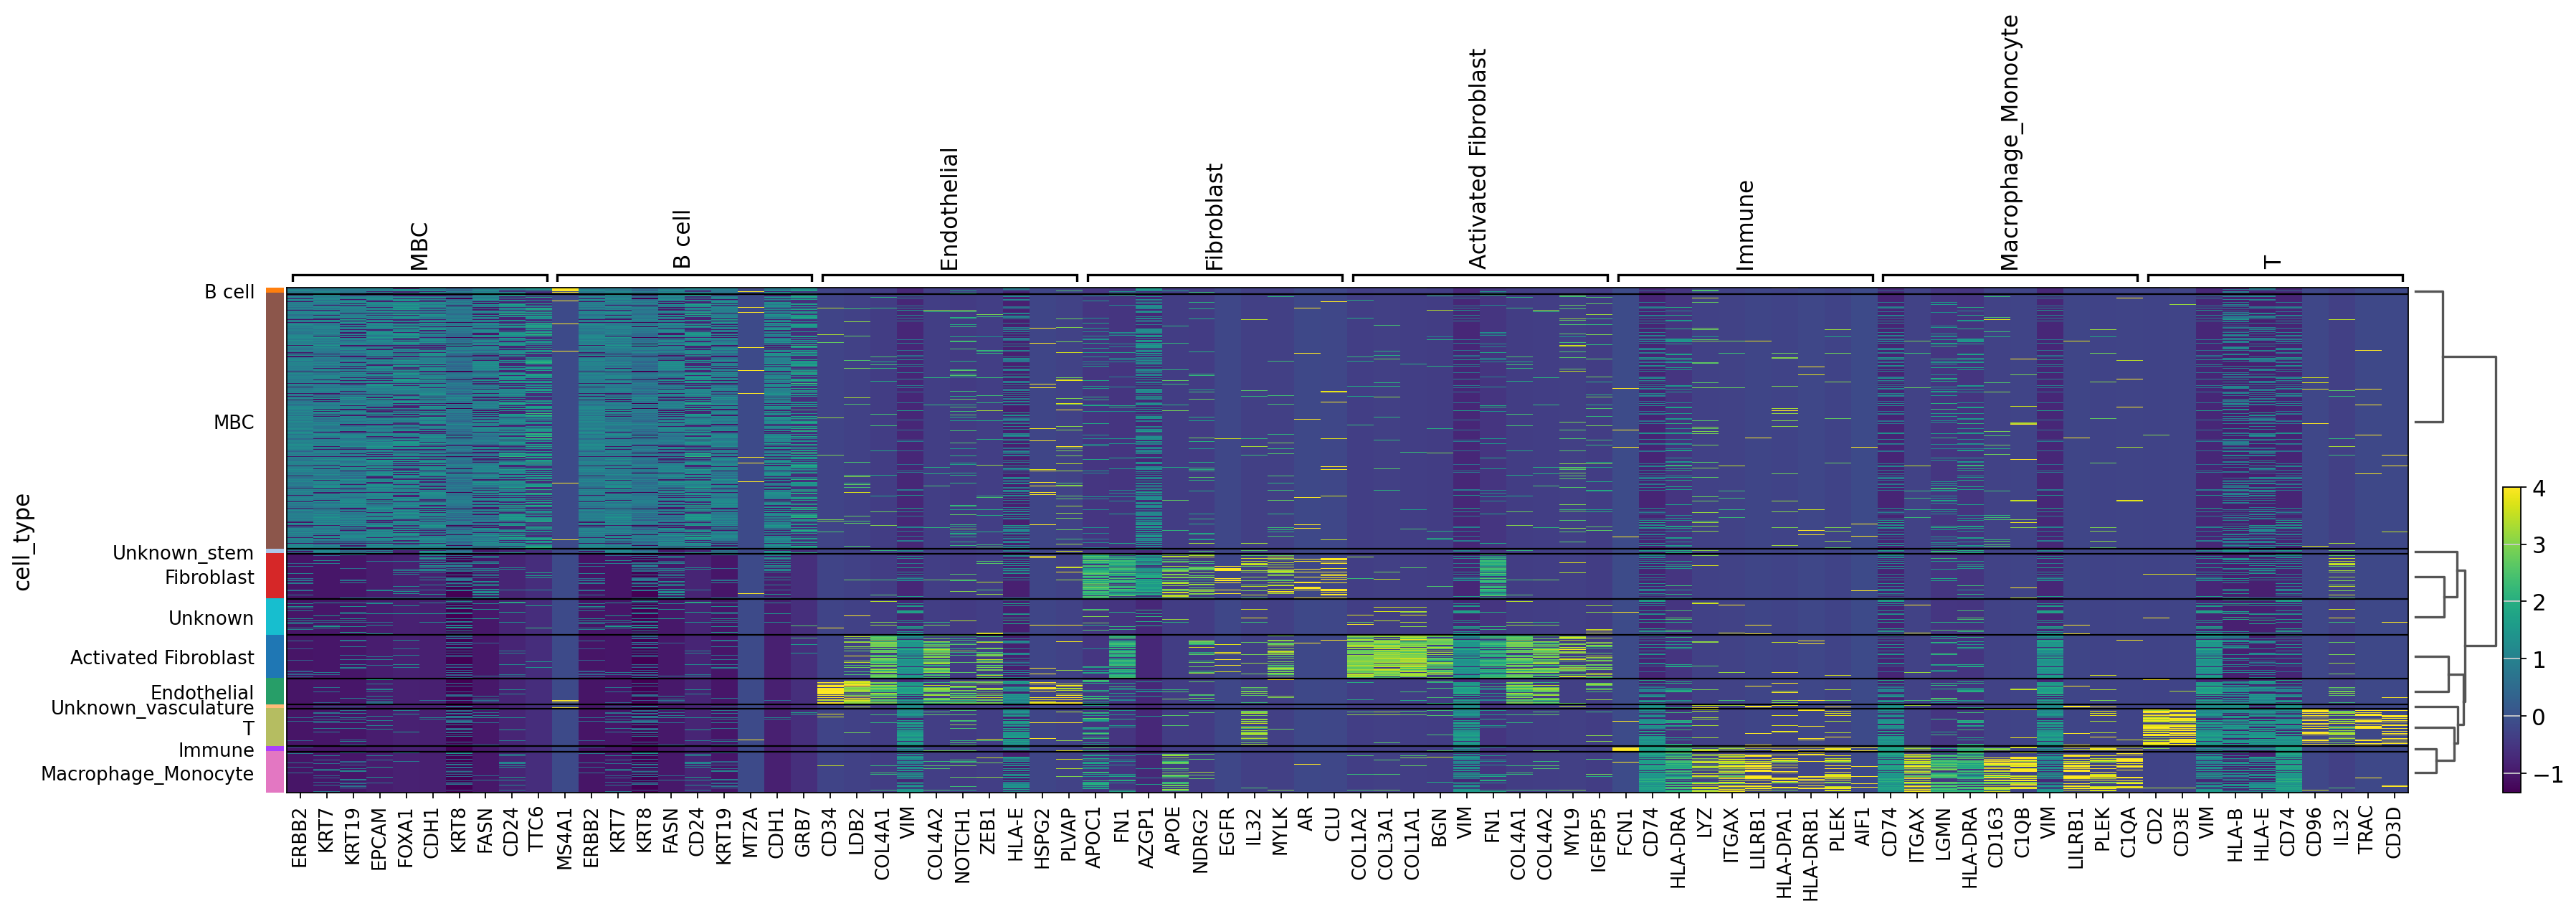

In [143]:
sc.set_figure_params(dpi_save = 300)
sc.tl.rank_genes_groups(adata, "cell_type", method="t-test")
sc.pl.rank_genes_groups_heatmap(adata, 
                                groups=['MBC','B cell','Endothelial','Fibroblast',
                                        'Activated Fibroblast','Immune','Macrophage_Monocyte','T'], 
                                n_genes=10, groupby="cell_type", show_gene_labels=True,vmax = 4,
                                save = 'celltype_gene_heatmap.png')

In [145]:
adata.obs

z_height  \
cellID                                                                         
154774619179741609399402395504929565453  [0.0, 1.5, 3.0, 4.5, 6.0, 7.5, 9.0]   
274342483938476675808302542374621878861  [0.0, 1.5, 3.0, 4.5, 6.0, 7.5, 9.0]   
55370073605773908452203275413212064754   [0.0, 1.5, 3.0, 4.5, 6.0, 7.5, 9.0]   
127211595292014380767242706128440765945  [0.0, 1.5, 3.0, 4.5, 6.0, 7.5, 9.0]   
332975249994792880754431178577120007780  [0.0, 1.5, 3.0, 4.5, 6.0, 7.5, 9.0]   
...                                                                      ...   
95043474972140185688786388051967045616   [0.0, 1.5, 3.0, 4.5, 6.0, 7.5, 9.0]   
337264409260567534506193523205204693314  [0.0, 1.5, 3.0, 4.5, 6.0, 7.5, 9.0]   
84062110715237164889741536789918881288   [0.0, 1.5, 3.0, 4.5, 6.0, 7.5, 9.0]   
197327668117127755107829931051252723312  [0.0, 1.5, 3.0, 4.5, 6.0, 7.5, 9.0]   
21642884986831837213172621211950097479   [0.0, 1.5, 3.0, 4.5, 6.0, 7.5, 9.0]   

                                                                                x_boundary  \
cellID                                                                                       
154774619179741609399402395504929565453  [[], [], [], [[347.1317603677511, 347.13176036...   
274342483938476675808302542374621878861  [[], [], [], [[126.09475419819354, 126.0947541...   
55370073605773908452203275413212064754   [[], [], [[-351.84023725092413, -351.840237250...   
127211595292014380767242706128440765945  [[], [[-431.39524014890196, -431.3952401489019...   
332975249994792880754431178577120007780  [[[-47.74523975551129, -47.74523975551129, -47...   
...                                                                                    ...   
95043474972140185688786388051967045616   [[], [[-468.89123924672606, -468.8912392467260...   
337264409260567534506193523205204693314  [[], [], [[-764.8112369388342, -764.8112369388...   
84062110715237164889741536789918881288   [[], [[-759.6882370620966, -759.6882370620966,...   
197327668117127755107829931051252723312  [[], [[-592.0462410956621, -592.0462410956621,...   
21642884986831837213172621211950097479   [[], [[65.49075565636159, 65.49075565636159, 6...   

                                                                                y_boundary  \
cellID                                                                                       
154774619179741609399402395504929565453  [[], [], [], [[3235.80374994874, 3235.69474995...   
274342483938476675808302542374621878861  [[], [], [], [[792.966873049736, 792.857873052...   
55370073605773908452203275413212064754   [[], [], [[-1454.3391258120537, -1454.44812580...   
127211595292014380767242706128440765945  [[], [[-6862.296247690916, -6862.4052476882935...   
332975249994792880754431178577120007780  [[[-79.95414045453072, -80.06314045190811, -80...   
...                                                                                    ...   
95043474972140185688786388051967045616   [[], [[-1244.202126055956, -1244.3111260533333...   
337264409260567534506193523205204693314  [[], [], [[-4700.773246765137, -4700.882246762...   
84062110715237164889741536789918881288   [[], [[-5323.757251024246, -5323.866251021624,...   
197327668117127755107829931051252723312  [[], [[-4014.881248831749, -4014.9902488291264...   
21642884986831837213172621211950097479   [[], [[-8799.947760909796, -8800.056760907173,...   

                                          x_centroid    y_centroid  \
cellID                                                               
154774619179741609399402395504929565453  1320.918671  12100.676377   
274342483938476675808302542374621878861  1098.833143   9655.475846   
55370073605773908452203275413212064754    620.162470   7407.713617   
127211595292014380767242706128440765945   540.718247   1999.864852   
332975249994792880754431178577120007780   921.644769   8781.863996   
...                                              ...           ...   
950434749721401856887

In [146]:
adata.write_h5ad('/sbgenomics/output-files/HTAPP-313_centroids_celltyped.h5ad')